# TensorFlow 2.0 Basics
Modified from https://github.com/aymericdamien/TensorFlow-Examples

## Hello World

In [1]:
import tensorflow as tf

In [2]:
# Create a constant Tensor
hello = tf.constant('Hello World')
print(hello)

tf.Tensor(b'Hello World', shape=(), dtype=string)


In [3]:
# To access a Tensor value, call numpy
print(hello.numpy())

b'Hello World'


## Basic Operation

In [4]:
# Define tensor constants.
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [5]:
# Various tensor operations.
add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

# Access tensors value.
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

add = 5
sub = -1
mul = 6
div = 0.6666666666666666


In [6]:
# Note: Tensors also support python operators (+, *, ...)
add = a + b
sub = a - b
mul = a * b
div = a / b

# Access tensors value.
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

add = 5
sub = -1
mul = 6
div = 0.6666666666666666


In [20]:
help(tf.reduce_all)

Help on function reduce_all in module tensorflow.python.ops.math_ops:

reduce_all(input_tensor, axis=None, keepdims=False, name=None)
    Computes the "logical and" of elements across dimensions of a tensor.
    
    Reduces `input_tensor` along the dimensions given in `axis`.
    Unless `keepdims` is true, the rank of the tensor is reduced by 1 for each
    entry in `axis`. If `keepdims` is true, the reduced dimensions
    are retained with length 1.
    
    If `axis` is None, all dimensions are reduced, and a
    tensor with a single element is returned.
    
    For example:
    
    ```python
    x = tf.constant([[True,  True], [False, False]])
    tf.reduce_all(x)  # False
    tf.reduce_all(x, 0)  # [False, False]
    tf.reduce_all(x, 1)  # [True, False]
    ```
    
    Args:
      input_tensor: The boolean tensor to reduce.
      axis: The dimensions to reduce. If `None` (the default), reduces all
        dimensions. Must be in the range `[-rank(input_tensor),
        rank(inpu

In [7]:
# calculate mean and sum
mean = tf.reduce_mean([a, b, c])
sum = tf.reduce_sum([a, b, c])

# Access tensors value.
print("mean =", mean.numpy())
print("sum =", sum.numpy())

mean = 3
sum = 10


In [8]:
# Matrix multiplications.
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)

# Tensor
print(product)
# Convert Tensor to Numpy
print(product.numpy())

tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
[[19. 22.]
 [43. 50.]]


## Simple Linear Regression

In [9]:
import numpy as np

In [10]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [11]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [12]:
# Weight and Bias, initialized randomly.
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [13]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [14]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.114325, W: 0.361271, b: 0.021528
step: 100, loss: 0.110048, W: 0.354811, b: 0.067326
step: 150, loss: 0.106260, W: 0.348732, b: 0.110425
step: 200, loss: 0.102906, W: 0.343011, b: 0.150985
step: 250, loss: 0.099935, W: 0.337627, b: 0.189155
step: 300, loss: 0.097304, W: 0.332560, b: 0.225076
step: 350, loss: 0.094973, W: 0.327792, b: 0.258881
step: 400, loss: 0.092910, W: 0.323305, b: 0.290693
step: 450, loss: 0.091082, W: 0.319082, b: 0.320632
step: 500, loss: 0.089463, W: 0.315108, b: 0.348806
step: 550, loss: 0.088030, W: 0.311368, b: 0.375320
step: 600, loss: 0.086760, W: 0.307849, b: 0.400272
step: 650, loss: 0.085636, W: 0.304536, b: 0.423754
step: 700, loss: 0.084640, W: 0.301419, b: 0.445852
step: 750, loss: 0.083758, W: 0.298486, b: 0.466648
step: 800, loss: 0.082977, W: 0.295725, b: 0.486219
step: 850, loss: 0.082285, W: 0.293128, b: 0.504637
step: 900, loss: 0.081673, W: 0.290683, b: 0.521969
step: 950, loss: 0.081130, W: 0.288382, b: 0.538280
step: 1000, l

In [15]:
import matplotlib.pyplot as plt

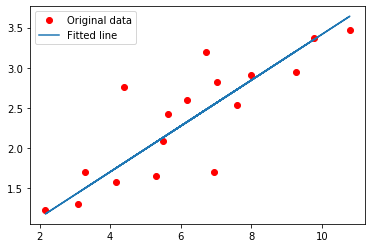

In [16]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()